**This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.**

# **Problem Statement:**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information. 


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers. 

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted. 



# Objective:

To build a model to predict which customer is potentially going to purchase the newly introduced travel package.

# **Data Description:**

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in. 
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

### Let's start by importing necessary libraries

In [2]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

### Load and overview the dataset

In [100]:
#Loading the dataset - sheet_name parameter is used if there are Basicple tabs in the excel file.
data=pd.read_excel("Tourism.xlsx",sheet_name='Tourism')

In [101]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [102]:
data.groupby("Designation").mean()["MonthlyIncome"]

Designation
AVP               32241.046784
Executive         19939.922507
Manager           22643.157629
Senior Manager    26637.749326
VP                35878.947826
Name: MonthlyIncome, dtype: float64

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- There are total of 20 columns and 4,888 observations in the dataset
- We can see that 8 columns have less than 4,888 non-null values i.e. columns have missing values.

**Check the percentage of missing values in each column**

In [104]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)})

,% of Missing Values
CustomerID,0.00
ProdTaken,0.00
Age,4.62
TypeofContact,0.51
CityTier,0.00
DurationOfPitch,5.14
Occupation,0.00
Gender,0.00
NumberOfPersonVisiting,0.00
NumberOfFollowups,0.92


- The `Age` column has 4.62% missing values out of the total observations.
- `TypeofContact` column has 0.51% missing values out of the total observations.
- `DurationOfPitch` column has 5.14% missing values out of the total observations.
- The `NumberOfFollowups` column has 0.92% missing values out of the total observations.
- `PreferredPropertyStar` column has 0.53% missing values out of the total observations.
- `NumberOfTrips` column has 2.86% missing values out of the total observations.
- `NumberOfChildrenVisiting` column has 1.35% missing values out of the total observations.
- The `MonthlyIncome` column has 4.77% missing values out of the total observations.
- We will impute these values after we split the data into train and test sets.

**Let's check the number of unique values in each column**

In [105]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- We can drop the column - CustomerID as it is unique for each customer and will not add value to the model.
- Most of the variables are categorical except - Age, duration of pitch, monthly income, and number of trips of customers.

In [106]:
#Dropping CustomerID column
data.drop(columns='CustomerID',inplace=True)

**Summary of the data**

In [107]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


- Mean and median of age column are very close to each other i.e. approx 37 and 36 respectively.
- Duration of pitch has some outliers at the right end as the 75th percentile value is 20 and the max value is 127. We need to explore this further.
- It seems like monthly income has some outliers at both ends. We need to explore this further.
- The number of trips also has some outliers as the 75th percentile value is 4 and the max value is 22.
- We can see that the target variable - ProdTaken is imbalanced as most of the values are 0. 

**Let's check the count of each unique category in each of the categorical variables.** 

In [108]:
#Making a list of all catrgorical variables 
cat_col=['TypeofContact', 'CityTier','Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
--------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------

- The Free lancer category in the occupation column has just 2 entries out of 4,888 observations.
- We can see that Gender has 3 unique values which include - 'Fe Male' and 'Female'. This must be a data input error, we should replace 'Fe Male' with 'Female'.
- NumberOfPersonVisiting equal to 5 has a count equal to 3 only.
- The majority of the customers are married.
- The majority of the customers own a car.

In [109]:
#Replacing 'Fe Male' with 'Female'
data.Gender=data.Gender.replace('Fe Male', 'Female')

In [110]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [112]:
## Creating a copy of data to perform detailed EDA in the appendix section 
df = data.copy()


### Note: The EDA section of the notebook has been covered multiple times in the previous case studies. For this discussion, EDA section can be skipped and we can refer to the **<a href = #link>EDA summary</a>** below. For the detailed EDA, **<a href = #link1>Appendix Section</a>** can be referred. 

#### The below three functions need to be defined to carry out the Exploratory Data Analysis.

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<a id='eda'></a>
### <a id='link'>Summary of EDA</a>

- There are total of 20 columns and 4,888 observations in the dataset
- We can see that 8 columns have less than 4,888 non-null values i.e. columns have missing values.

**Data Cleaning:**
    
* Drop the column - CustomerID as it is unique for each customer and will not add value to the model.
* Replace "Fe male" with "Female" considering this a data error. 
* Remove these outliers form duration of pitch, monthly income, and number of trips.

**Observations from EDA** 

**Univariate Analysis**

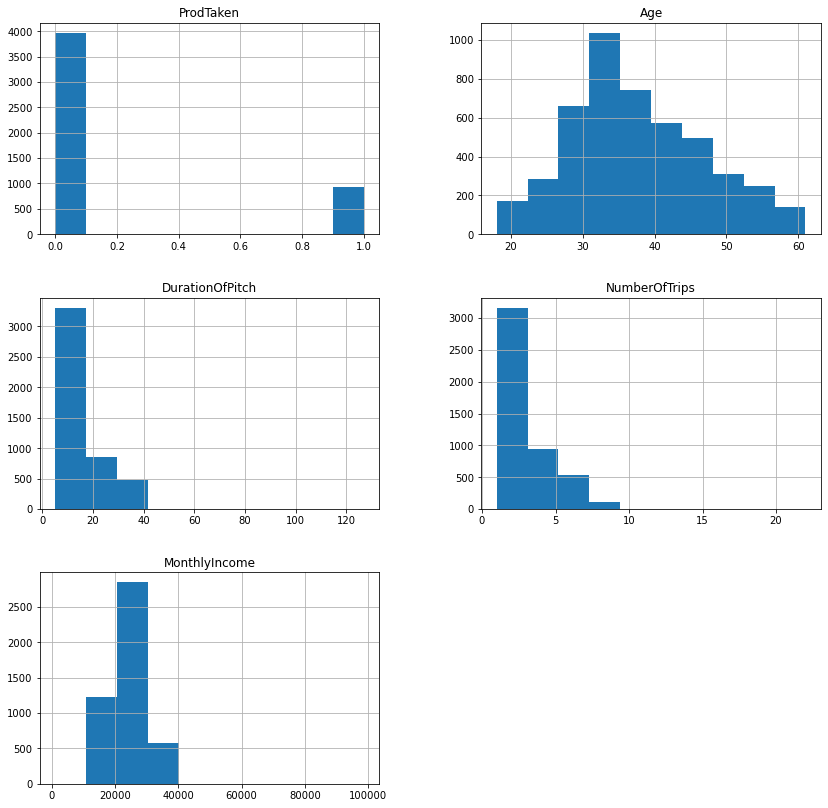

In [19]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

* `Age`: The distribution of Age shows that the age of the customers vary from ~ 20- 60 and average age is around 35
* `DurationOfPitch` : The distribution for the duration of pitch is right-skewed. The duration of the pitch for most of the customers is less than 20 minutes.
* `NumberOfTrips` : The distribution for the number of trips is right-skewed. We can see that most of the customers have taken 2 or 3 trips. 
* `MonthlyIncome` : The distribution for monthly income shows that most of the values lie between 20,000 to 40,000.Income is one of the important factors to consider while approaching a customer with a certain package. 
* `NumberOfPersonVisiting`: Most customers have 3 persons who are visiting with them. This can be because most people like to travel with family.
* `Occupation` : The majority of customers are either salaried or owns a small business.
* `CityTier`: Most of the customers are from tier 1 cities. This can be because of better living standards and exposure as compared to tier 2 and tier 3 cities.
* `Gender` : Male customers are more than the number of female customers. This might be because males do the booking/inquiry when traveling with females which imply that males are the direct customers of the company.
* `NumberOfFollowups` : The company usually follow-ups with 3 or 4 times with their customers
* `ProductPitched` : The company pitches Deluxe or Basic packages to their customers more than the other packages. This might be because the company makes more profit from Deluxe or Basic packages or these packages are less expensive, so preferred by the majority of the customers.
* `PreferredPropertyStar` : Approx 61% of customers prefer the three-star property. Approx 39% of customers prefer 4 or 5 star properties. These can be the high-income customers with high income. 
* `TypeofContact` : There are approx 70% of customers who reached out to the company first i.e. self-inquiry. This shows the positive outreach of the company as most of the inquires are initiated from the customer's end.
* `MaritalStatus` : Approx half of the customer base of the company is from the married people. This might be because the company offers more couple-friendly or family packages.
* `Passport` : Most of the customers i.e. approx 71% do not have a passport. The company can provide services to help customers with getting new or renewing their passport as most of the customers do not have a passport.
* `PitchSatisfactionScore` : Average i.e. 3 is the most common pitch satisfaction score given by customers.
* `Designation` : Approx 73% of the customers are at the executive or manager level. We can see that the higher the position, the lesser number of observations which makes sense as executives/managers are more common than AVP/VP.
* `NumberOfChildrenVisiting` : Approx 78% of customers visit with their children and approx 34% of them have more than 1 child with them. 22% of customers visit without children. These may be the single/unmarried customers or recently married.

**Bivariate Analysis** 

**ProdTaken vs NumberOfPersonVisiting** 
- The conversion rate is high when the number of persons is more than 1.
- This might be because the company is not providing good solo packages.
- The conversion rate is zero when the number of persons visiting is 5. However, there are just 3 such observations so cannot give any conclusive insights.

**ProdTaken vs Occupation** 
- The conversion rate for large business owners is higher than salaried or small business owners. 
- This might be because large business owners have high income.
- Freelancer have 100% conversion rate but there is just 2 such observation, so cannot give any conclusive insights.


**ProdTaken vs MaritalStatus** 


In [ ]:
stacked_barplot(data, "MaritalStatus", "ProdTaken" )

- The married people are the most common customer for the company but this graph shows that the conversion rate is higher for single and unmarried customers as compared to the married customers.
- The company can target single and unmarried customers more and can modify packages as per these customers.

**ProdTaken vs Passport** 

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


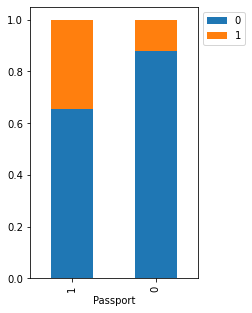

In [20]:
stacked_barplot(data, "Passport", "ProdTaken" )

- The conversion rate for customers with a passport is higher as compared to the customers without a passport.
- The company should customize more international packages to attract more such customers.


**ProdTaken vs ProductPitched** 
- The conversion rate of customers is higher if the product pitched is Basic. This might be because the basic package is less expensive. 
- We saw earlier that company pitches the deluxe package more than the standard package, but the standard package shows a higher conversion rate than the deluxe package. The company can pitch standard packages more often.

**ProdTaken vs Designation**



In [ ]:
stacked_barplot(data, "Designation", "ProdTaken" )

- The conversion rate of executives is higher than other designations.
- Customers at VP and AVP positions have the least conversion rate.


**ProdTaken vs DurationOfPitch**
- The customers who purchased a package have a longer duration of pitch.
- The company salesperson should give more time while pitching a certain package and convey relevant information to the customer 

**ProdTaken vs MonthlyIncome** 
- Customers who purchased a package have a lower median income than customers who did not purchase a package. This might be because of our earlier observation that executives are more likely to purchase a package.

**Customer Profiling** 
Grouping data w.r.t to packages to build customer profiles

**Basic**

In [21]:
data[(data['ProductPitched']=='Basic') & (data['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,552.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,515.0,NaN,NaN,NaN,31.28932,9.070829,18.0,25.0,30.0,35.0,59.0
TypeofContact,549,2,Self Enquiry,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552.0,3.0,1.0,392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,532.0,NaN,NaN,NaN,15.791353,7.906926,6.0,9.0,14.0,22.0,36.0
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,2,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552.0,3.0,3.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,548.0,6.0,4.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,552,1,Basic,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Average monthly income for customers opting for the basic package is ~20,165.
- Average age of customers opting for the basic package is ~31
- Majority of the customers opting for the basic package are at the executive designation
- Majority of the customers opting for the basic package are single

Similarly we can group the data for other packages and create customer profiles.
**Standard** 
- Average monthly income of customers opting for the standard package is ~26,035.
- Average age for customers opting for the standard package is ~41
- Majority of the customers opting for the standard package are at senior manager designation
- Majority of the customers opting for the standard package are married

**Deluxe** 
- Average monthly income of customers opting for the deluxe package is ~23,106.
- Average age for customers opting for the deluxe package is ~37
- Majority of the customers opting for the deluxe package are at manager designation
- Majority of the customers opting for the deluxe package are married

**Super Deluxe**
- Average monthly income of customers opting for the super deluxe package is ~29,823.
- Average age for customers opting for the super deluxe package is ~43
- Majority of the customers opting for the super deluxe package are at AVP designation
- Majority of the customers opting for the super deluxe package are single

**King**
- Average monthly income of customers opting for the king package is ~34,672.
- Average age for customers opting for the king package is ~49
- Majority of the customers opting for the king package are at VP designation
- Majority of the customers opting for the king package are single

**Data Processing**

In [22]:
data.NumberOfTrips.value_counts(normalize=True)

2.0     0.308340
3.0     0.227254
1.0     0.130581
4.0     0.100674
5.0     0.096462
6.0     0.067818
7.0     0.045914
8.0     0.022115
19.0    0.000211
21.0    0.000211
20.0    0.000211
22.0    0.000211
Name: NumberOfTrips, dtype: float64

- We can see that most of the customers i.e. 52% have taken 2 or 3 trips.
- As expected, with the increase in the number of trips the percentage of customers is decreasing.
- The percentage of categories 19 or above is very less. We can consider these values as outliers.
- We can see that there are just four observations with a number of trips 19 or greater

**Removing these outliers form duration of pitch, monthly income, and number of trips.**

In [23]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
data.drop(index=data[data.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
data.drop(index=data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
data.drop(index=data[data.NumberOfTrips>10].index,inplace=True)

### Split the dataset into train and test sets

In [24]:
#Separating target variable and other variables
X=data.drop(columns='ProdTaken')
Y=data['ProdTaken']

 **As we aim to predict customers who are more likely to buy the product, we should drop the columns `DurationOfPitch', 'NumberOfFollowups', 'ProductPitched', 'PitchSatisfactionScore'` as these columns would not be available at the time of prediction for new data.**

In [25]:
#Dropping columns
X.drop(columns=['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'],inplace=True)

In [26]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

**As we saw earlier, our data has missing values. We will impute missing values using median for continuous variables and mode for categorical variables. We will use `SimpleImputer` to do this.**

**The `SimpleImputer` provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median, or most frequent) of each column in which the missing values are located.**

In [27]:
si1=SimpleImputer(strategy='median')

median_imputed_col=['Age','MonthlyIncome','NumberOfTrips']

#Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])

In [28]:
si2=SimpleImputer(strategy='most_frequent')

mode_imputed_col=['TypeofContact','PreferredPropertyStar','NumberOfChildrenVisiting']

#Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

#Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [29]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64
------------------------------
Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


**Let's create dummy variables for string type variables and convert other column types back to float.**

In [30]:
#converting data types of columns to float
for column in ['NumberOfPersonVisiting', 'Passport', 'OwnCar']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [31]:
#List of columns to create a dummy variables
col_dummy=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']

In [32]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

# Building the model

### Model evaluation criterion:

#### The model can make wrong predictions as:
1. Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not buy the product but he buys i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* The company wants Recall to be maximized, the greater the Recall lesser the chances of false negatives.

**Let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [33]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [34]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.871585  0.641304   0.665414  0.653137


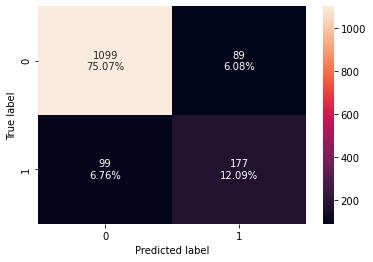

In [35]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree, X_train,y_train)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree, X_test,y_test)
print("Testing performance:\n", d_tree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

- The model is overfitting the training data as training recall/precision is much higher than the test recall/precision

### Cost Complexity Pruning

**Let's try pruning the tree and see if the performance improves.**

In [36]:
path = d_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [37]:
clfs_list = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs_list.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs_list[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.019282372972987682


In [38]:
#Fitting model for each value of alpha and saving the train recall in a list 
recall_train=[]
for clf in clfs_list:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

In [39]:
#Fitting model for each value of alpha and saving the test recall in a list
recall_test=[]
for clf in clfs_list:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

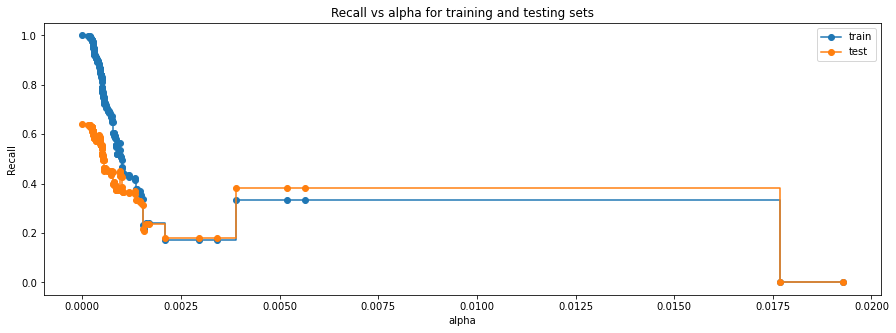

In [40]:
#Plotting the graph for Recall VS alpha 
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.871585  0.641304   0.665414  0.653137


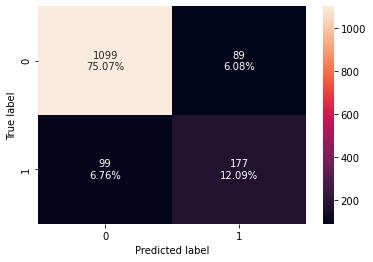

In [41]:
#Creating the model where we get highest test recall
index_best_pruned_model = np.argmax(recall_test)

pruned_dtree_model = clfs_list[index_best_pruned_model]

#Calculating different metrics
pruned_dtree_model_train_perf=model_performance_classification_sklearn(pruned_dtree_model, X_train,y_train)
print("Training performance:\n", pruned_dtree_model_train_perf)
pruned_dtree_model_test_perf=model_performance_classification_sklearn(pruned_dtree_model, X_test,y_test)
print("Testing performance:\n", pruned_dtree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(pruned_dtree_model,X_test,y_test)

- We can see from the graph plotted above that maximum test recall is for the model without pruning i.e. alpha=0
- There is no improvement in the model performance as the best-pruned model fitted is the same as we built initially. 
- Let's try hyperparameter tuning, with class weights to compensate for the imbalanced data, and see if the model performance improves.

### Hyperparameter Tuning

In [42]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.803456  0.663551   0.483541  0.559422
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.777322  0.652174   0.439024  0.524781


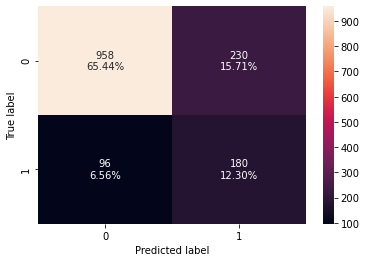

In [43]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test,y_test)
print("Testing performance:\n", dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

- The model is generalizing well and not overfitting the data
- The recall is still similar on the test data but the precision has decreased significantly.

## Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.894126  0.51087   0.875776  0.645309


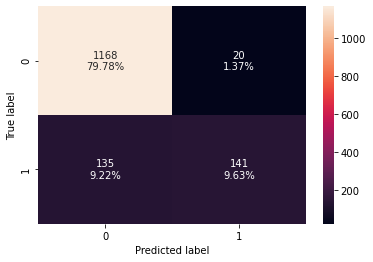

In [44]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

- With default parameters, random forest is performing better than decision tree in terms of precision but has less recall.
- The model is overfitting the training data.
- We'll try to reduce overfitting and improve recall by hyperparameter tuning.

### Hyperparameter Tuning

In [45]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=15,
                       max_features=None, min_samples_leaf=11, n_estimators=60,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy   Recall  Precision       F1
0   0.89133  0.88162   0.657375  0.75316
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.814891  0.663043   0.506925  0.574568


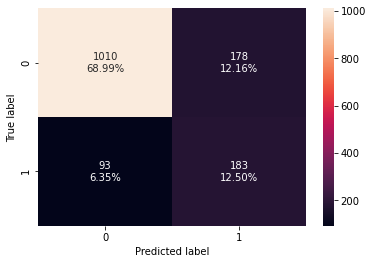

In [46]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned, X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned, X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

- The overfitting has been reduced after tuning the model.
- The recall has improved on the test data but the precision has decreased significantly.

## Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.990334  0.951713   0.996737  0.973705
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.886612  0.51087   0.819767  0.629464


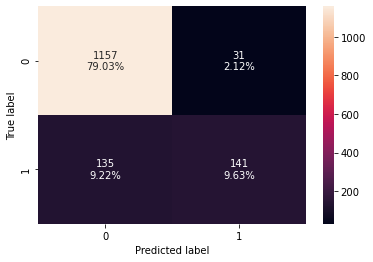

In [47]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier, X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier, X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

- With default parameters, the bagging classifier is performing well in terms of precision but has less recall.
- The model is overfitting the training data.
- We'll try to reduce overfitting and improve recall by hyperparameter tuning.

### Hyperparameter Tuning

In [48]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999121  0.995327        1.0  0.997658
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.900956  0.554348   0.874286  0.678492


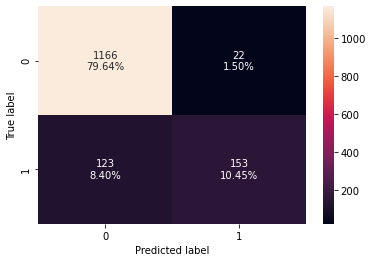

In [49]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

- The test recall and test precision have improved but the model is still overfitting the training data.
- The recall is still very low.

## AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.845343  0.299065   0.711111  0.421053
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.842213  0.282609   0.702703  0.403101


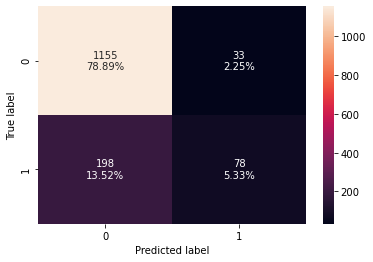

In [50]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier, X_train,y_train)
print("Training performance:\n",ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier, X_test,y_test)
print("Testing performance:\n",ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

- The model is not overfitting the data but is giving very low recall on training and test data.

### Hyperparameter Tuning

In [51]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.2000000000000002, n_estimators=100,
                   random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.983304  0.928349   0.981878  0.954363
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.861339  0.557971   0.655319  0.60274


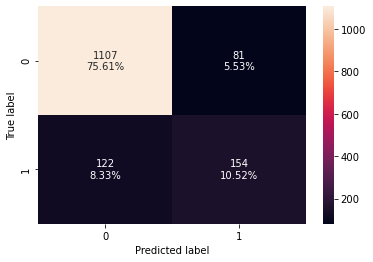

In [52]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance:\n",abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test,y_test)
print("Testing performance:\n",abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

- The train, as well as test recall, have improved significantly but the model is overfitting the training data now.

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.878735  0.433022   0.847561  0.573196
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.861339  0.373188   0.774436  0.503667


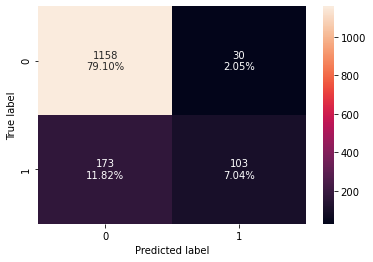

In [53]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier, X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier, X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

- The model is slightly overfitting the training data in terms of recall and precision but is giving very low recall on training and test data.
- The recall is better as compared to AdaBoost with default parameters but still not great.

### Hyperparameter Tuning

In [54]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.8)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.911541  0.590343   0.906699  0.715094
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.866803  0.442029   0.748466  0.555809


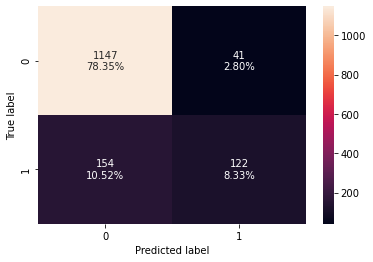

In [55]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

- The model performance has improved slightly after hyperparameter tuning but the model is still overfitting the training data.
- The test precision has decreased slightly and the test recall has increased slightly but still very low. 

## XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994728  0.971963        1.0  0.985782
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.889344  0.554348   0.796875  0.653846


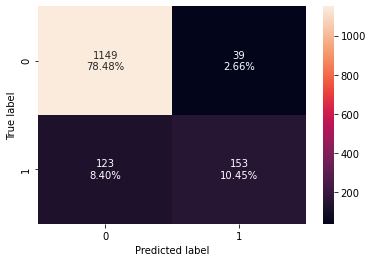

In [56]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric= "error")
xgb_classifier.fit(X_train.astype('int'),y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier, X_train.astype(
'int'),y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier, X_test.astype('int'),y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test.astype('int'),y_test)

- With default parameters, the model is overfitting the training data.
- The model is not able to correctly identify potential customers i.e. the test recall is very low.

### Hyperparameter Tuning

In [57]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train.astype('int'), y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train.astype('int'), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='logloss', gamma=3,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.824839  0.817757   0.521869  0.637136
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.771858  0.695652   0.434389  0.534819


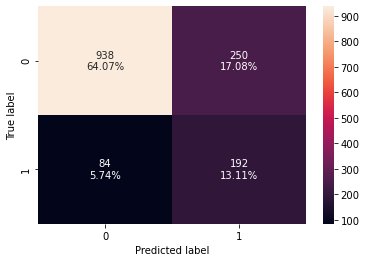

In [58]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned, X_train.astype('int'),y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned, X_test.astype('int'),y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test.astype('int'),y_test)

- The overfitting has reduced after hyperparameter tuning but is still an overfit model.
- The tuned xgboost model is giving the highest recall yet among all the models we built.
- Let's try one more model - Stacking classifier.

## Stacking Classifier

- Stacking classifier stacks the output of individual estimators and use a classifier to compute the final prediction
- Stacking allows using the strength of each estimator by using their output as input of a final estimator

In [59]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=15,
                                                       max_features=None,
                                                       min_samples_leaf=11,
                                                       n_estimators=60,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=250,
                                                    

Training performance:
    Accuracy    Recall  Precision        F1
0  0.838606  0.878505   0.543877  0.671828
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.766393  0.735507   0.430085  0.542781


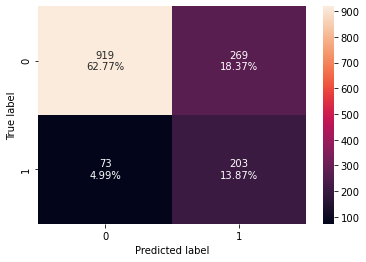

In [60]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier, X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier, X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

- Stacking classifier has further increased the recall that we got from the xgboost model but reduced the precision as well.
- Model is overfitting the training data.

## Comparing all models

In [61]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,pruned_dtree_model_train_perf.T, dtree_estimator_model_train_perf.T, rf_estimator_model_train_perf.T,
    rf_tuned_model_train_perf.T,bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
     xgb_tuned_model_train_perf.T, stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Prunned Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
     "XGBoost Classifier",
    "XGBoost Classifier Tuned","Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Prunned Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,0.803456,1.0,0.891330,0.990334,0.999121,0.845343,0.983304,0.878735,0.911541,0.994728,0.824839,0.838606
Recall,1.0,1.0,0.663551,1.0,0.881620,0.951713,0.995327,0.299065,0.928349,0.433022,0.590343,0.971963,0.817757,0.878505
Precision,1.0,1.0,0.483541,1.0,0.657375,0.996737,1.000000,0.711111,0.981878,0.847561,0.906699,1.000000,0.521869,0.543877
F1,1.0,1.0,0.559422,1.0,0.753160,0.973705,0.997658,0.421053,0.954363,0.573196,0.715094,0.985782,0.637136,0.671828


In [62]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,pruned_dtree_model_test_perf.T, dtree_estimator_model_test_perf.T, rf_estimator_model_test_perf.T,
    rf_tuned_model_test_perf.T,bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
     xgb_tuned_model_test_perf.T, stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Prunned Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
     "XGBoost Classifier",
    "XGBoost Classifier Tuned","Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Prunned Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.871585,0.871585,0.777322,0.894126,0.814891,0.886612,0.900956,0.842213,0.861339,0.861339,0.866803,0.889344,0.771858,0.766393
Recall,0.641304,0.641304,0.652174,0.510870,0.663043,0.510870,0.554348,0.282609,0.557971,0.373188,0.442029,0.554348,0.695652,0.735507
Precision,0.665414,0.665414,0.439024,0.875776,0.506925,0.819767,0.874286,0.702703,0.655319,0.774436,0.748466,0.796875,0.434389,0.430085
F1,0.653137,0.653137,0.524781,0.645309,0.574568,0.629464,0.678492,0.403101,0.602740,0.503667,0.555809,0.653846,0.534819,0.542781


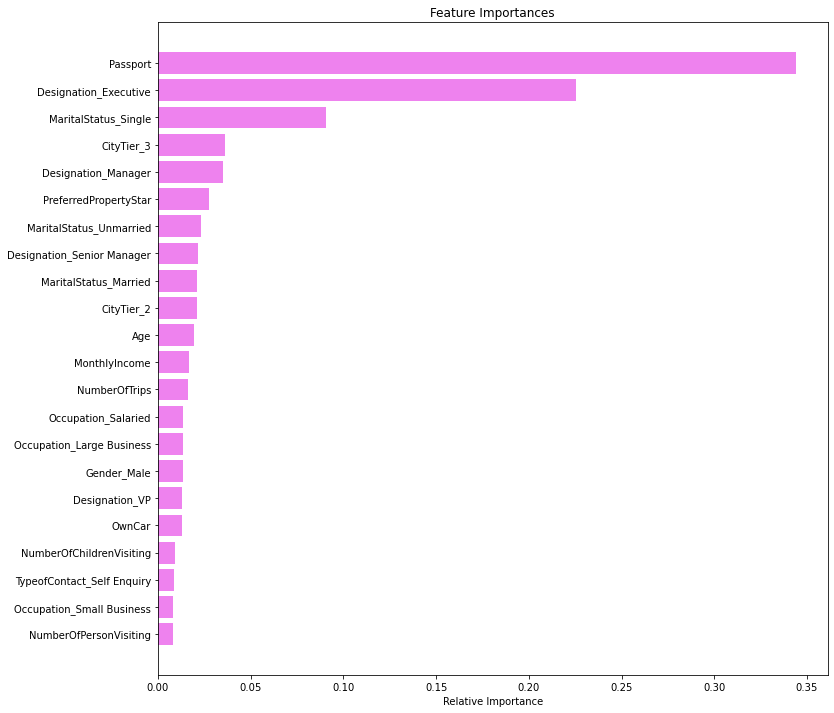

In [63]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Stacking classifier is giving the best test recall but it has no attribute to calculate feature importance. 
- Tuned xgboost is giving the second-highest test recall but the tuned decision tree is giving a generalized performance on the train and the test set. We have used xgboost model to demonstrate the calculation of the feature importance.
- Passport is the most important feature, followed by designation, marital status, and city tier, as per the tuned xgboost model.

# Business Recommendations

- Our analysis shows that very few customers have passports and they are more likely to purchase the travel package. The company should customize more international packages to attract more such customers.
- We have customers from tier 1 and tier 3 cities but very few from tier 2 cities. The company should expand its marketing strategies to increase the number of customers from tier 2 cities.
- We saw in our analysis that people with higher income or at high positions like AVP or VP are less likely to buy the product. The company can offer short-term travel packages and customize the package for higher- income customers with added luxuries to target such customers.
- When implementing a marketing strategy, external factors, such as the number of follow-ups, time of call, should also be carefully considered as our analysis shows that the customers who have been followed up more are the ones buying the package.
- After we identify a potential customer, the company should pitch packages as per the customer's monthly income, for example, do not pitch king packages to a customer with low income and such packages can be pitched more to the higher-income customers.
- We saw in our analysis that young and single people are more likely to buy the offered packages. The company can offer discounts or customize the package to attract more couples, families, and customers above 30 years of age.

## <a id='link1'>Appendix</a>

# EDA

## Univariate Analysis

In [113]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [114]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

### Observations on Age

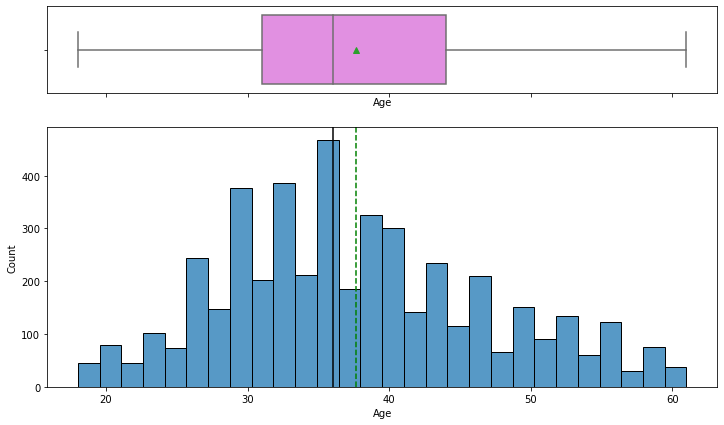

In [65]:
histogram_boxplot(df, "Age")

- Age distribution looks approximately normally distributed.
- The boxplot for the age column confirms that there are no outliers for this variable
- Age can be an important variable while targeting customers for the tourism package. We will further explore this in bivariate analysis.

### Observations on Duration of Pitch

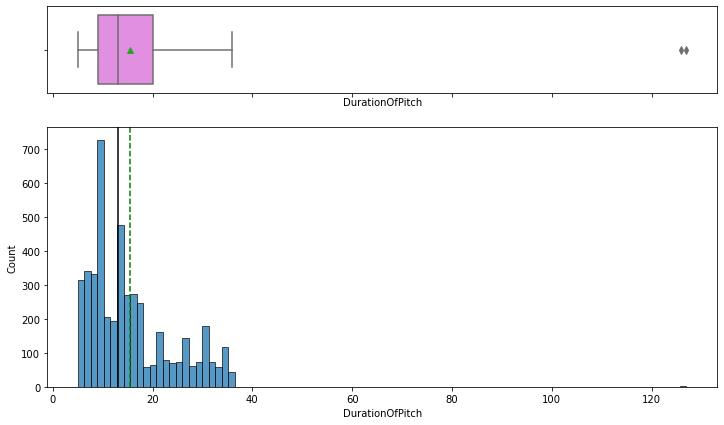

In [66]:
histogram_boxplot(df, 'DurationOfPitch')

- The distribution for the duration of pitch is right-skewed.
- The duration of the pitch for most of the customers is less than 20 minutes.
- There are some observations that can be considered as outliers as they are very far from the upper whisker in the boxplot. Let's check how many such extreme values are there.

In [67]:
df[df['DurationOfPitch']>40]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


- We can see that there are just two observations which can be considered as outliers.

### Observations on Monthly Income

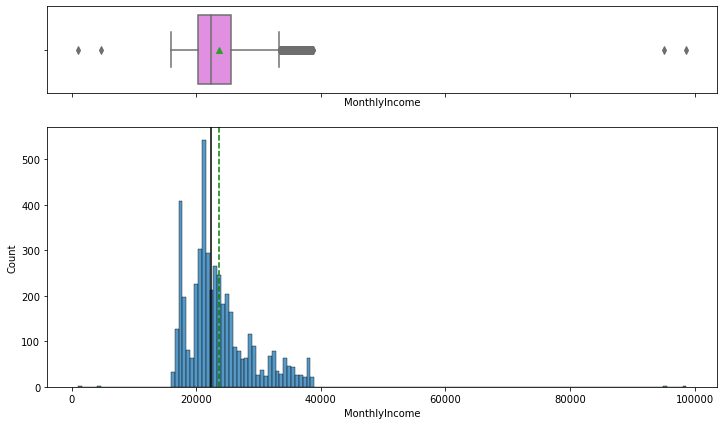

In [68]:
histogram_boxplot(df, 'MonthlyIncome')

- The distribution for monthly income shows that most of the values lie between 20,000 to 40,000.
- Income is one of the important factors to consider while approaching a customer with a certain package. We can explore this further in bivariate analysis. 
- There are some observations on the left and some observations on the right of the boxplot which can be considered as outliers. Let's check how many such extreme values are there. 

In [69]:
df[(df.MonthlyIncome>40000) | (df.MonthlyIncome<12000)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


- There are just four such observations which can be considered as outliers.

### Observations on Number of Trips

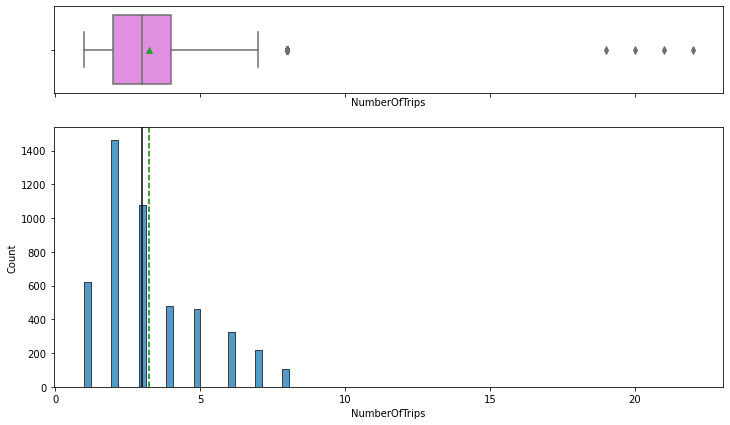

In [70]:
histogram_boxplot(df,'NumberOfTrips')

- The distribution for the number of trips is right-skewed 
- Boxplot shows that the number of trips has some outliers at the right end. Let's check how many such extreme values are there. 

In [71]:
df.NumberOfTrips.value_counts(normalize=True)

2.0     0.308340
3.0     0.227254
1.0     0.130581
4.0     0.100674
5.0     0.096462
6.0     0.067818
7.0     0.045914
8.0     0.022115
19.0    0.000211
21.0    0.000211
20.0    0.000211
22.0    0.000211
Name: NumberOfTrips, dtype: float64

- We can see that most of the customers i.e. 52% have taken 2 or 3 trips.
- As expected, with the increase in the number of trips the percentage of customers is decreasing.
- The percentage of categories 19 or above is very less. We can consider these values as outliers.
- We can see that there are just four observations with a number of trips 19 or greater

**Removing these outliers form duration of pitch, monthly income, and number of trips.**

In [72]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
df.drop(index=df[df.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
df.drop(index=df[(df.MonthlyIncome>40000) | (df.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
df.drop(index=df[df.NumberOfTrips>10].index,inplace=True)

**Let's define a function to create barplots for the categorical variables indicating percentage of each category for that variables.**

In [129]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Number of Person Visiting

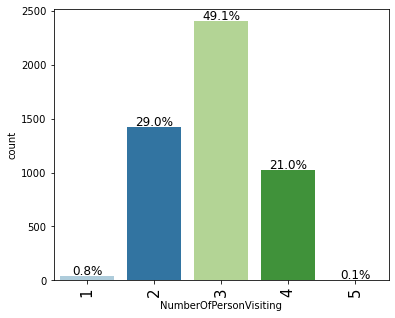

In [130]:
labeled_barplot(df, "NumberOfPersonVisiting", perc=True)

- Most customers have 3 persons who are visiting with them. This can be because most people like to travel with family.
- As mentioned earlier, there are just 3 observations where the number of persons visiting with the customers are 5 i.e. 0.1%.

### Observations on Occupation

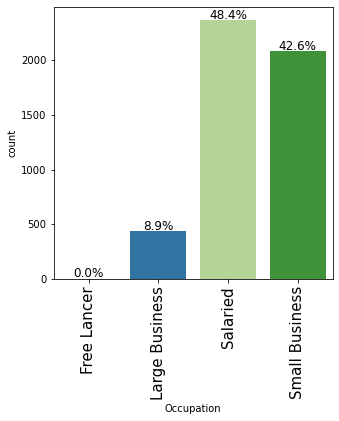

In [131]:
labeled_barplot(df, "Occupation", perc=True)

- The majority of customers i.e. 91% are either salaried or owns a small business. 
- As mentioned earlier, the free lancer category has only 2 observations.

### Observations on City Tier

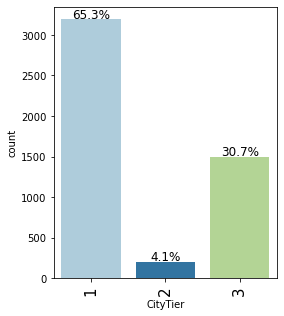

In [132]:
labeled_barplot(df, "CityTier", perc=True)

- Most of the customers i.e. approx 65% are from tier 1 cities. This can be because of better living standards and exposure as compared to tier 2 and tier 3 cities.
- Surprisingly, tier 3 cities have a much higher count than tier 2 cities. This can be because the company has less marketing in tier 2 cities.

### Observations on Gender

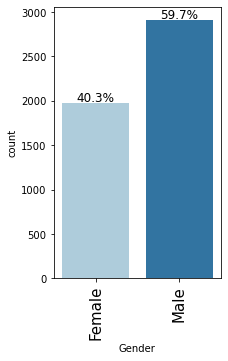

In [133]:
labeled_barplot(df, "Gender", perc=True)

- Male customers are more than the number of female customers
- There are approx 60% male customers as compared to 40% female customers
- This might be because males do the booking/inquiry when traveling with females which imply that males are the direct customers of the company.

### Observations on Number of Follow ups

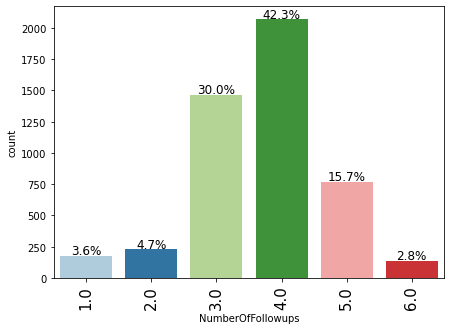

In [134]:
labeled_barplot(df, "NumberOfFollowups", perc=True)

- We can see that company usually follow-ups with 3 or 4 times with their customers
- We can explore this further and observe which number of follow-ups have more customers who buy the product.

### Observations on Product Pitched

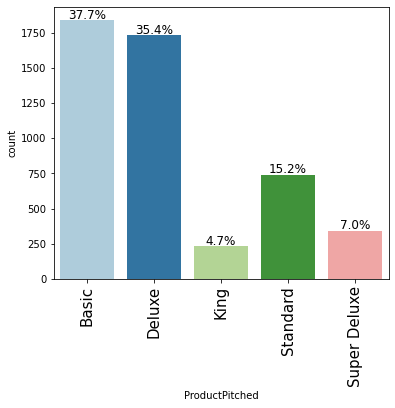

In [135]:
labeled_barplot(df, "ProductPitched", perc=True)

- The company pitches Deluxe or Basic packages to their customers more than the other packages. 
- This might be because the company makes more profit from Deluxe or Basic packages or these packages are less expensive, so preferred by the majority of the customers.

### Observations on Preferred Property Star

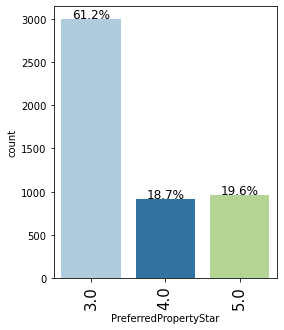

In [136]:
labeled_barplot(df, "PreferredPropertyStar", perc=True)

- Approx 61% of customers prefer the three-star property.
- Approx 39% of customers prefer 4 or 5 star properties. These can be the high-income customers with high income.

### Observations on Type of Contact

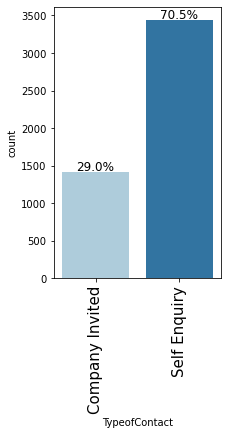

In [137]:
labeled_barplot(df, "TypeofContact", perc=True)

- There are approx 70% of customers who reached out to the company first i.e. self-inquiry. 
- This shows the positive outreach of the company as most of the inquires are initiated from the customer's end.

### Observations on Marital Status

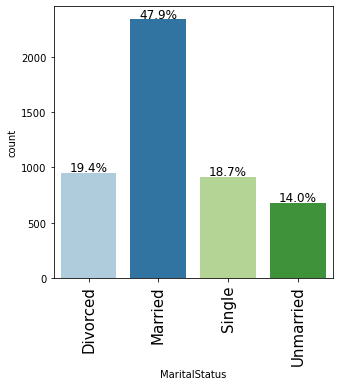

In [138]:
labeled_barplot(df, "MaritalStatus", perc=True)

- Approx half of the customer base of the company is from the married people. 
- This might be because the company offers more couple-friendly or family packages.

### Observations on Passport

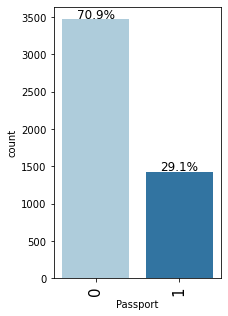

In [139]:
labeled_barplot(df, "Passport", perc=True)

- Most of the customers i.e. approx 71% do not have a passport
- The company can provide services to help customers with getting new or renewing their passport as most of the customers do not have a passport

### Observations on Pitch Satisfaction Score

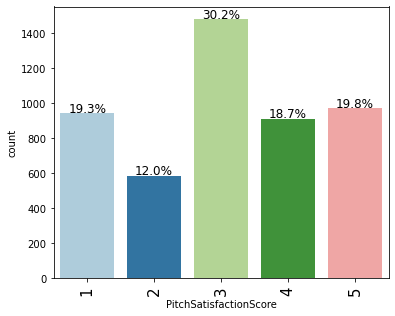

In [140]:
labeled_barplot(df, "PitchSatisfactionScore", perc=True)

- Average i.e. 3 is the most common pitch satisfaction score given by customers.
- We can explore this further and observe which satisfaction score has more customers who actually buy the product.

### Observations on Designation

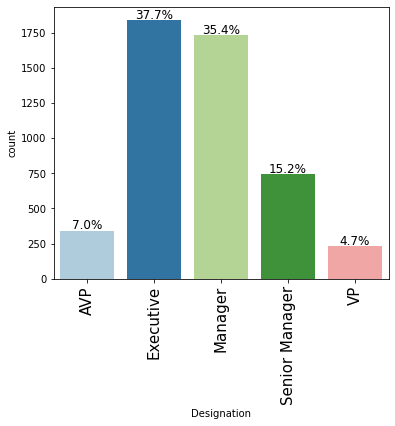

In [141]:
labeled_barplot(df, "Designation", perc=True)

- Approx 73% of the customers are at the executive or manager level.
- We can see that the higher the position, the lesser number of observations which makes sense as executives/managers are more common than AVP/VP. 

### Observations on Number of Children Visiting

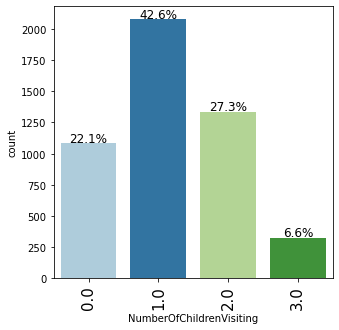

In [142]:
labeled_barplot(df, "NumberOfChildrenVisiting", perc=True)

- Approx 78% of customers visit with their children and approx 34% of them have more than 1 child with them.
- 22% of customers visit without children. These may be the single/unmarried customers or recently married.

### Observations on Product Taken

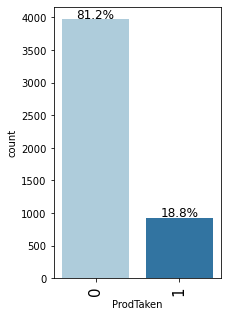

In [143]:
labeled_barplot(df, "ProdTaken", perc=True)

- This plot shows the distribution of both classes in the target variable is `imbalanced`.
- We only have approx 19% of customers who have purchased the product.

## Bivariate Analysis

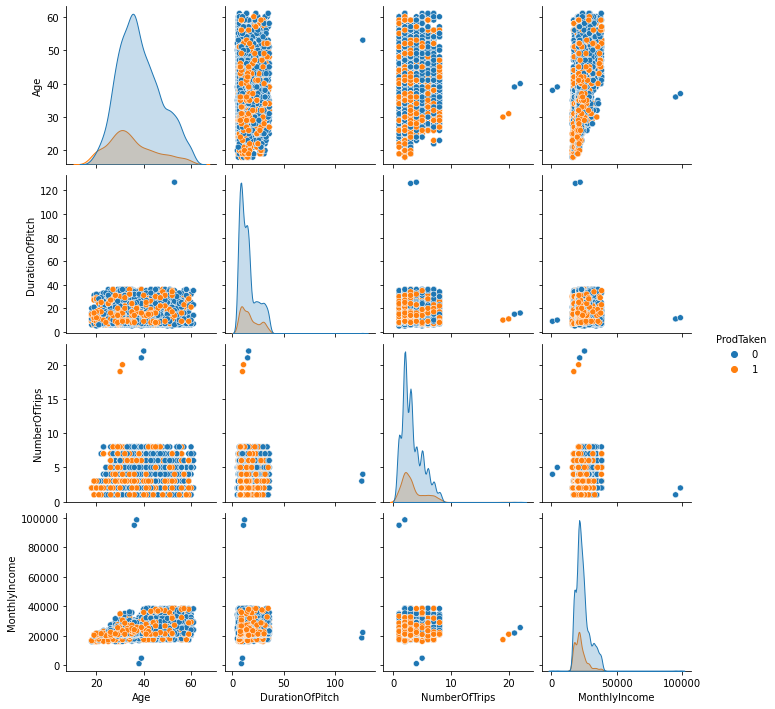

In [145]:
sns.pairplot(data=df,hue='ProdTaken')

- There are overlaps i.e. no clear distinction in the distribution of variables for people who have taken the product and did not take the product.
- Let's explore this further with the help of other plots.

**Let's define one more function to plot stacked bar charts**

In [146]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Prod Taken vs Number of Person Visiting

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


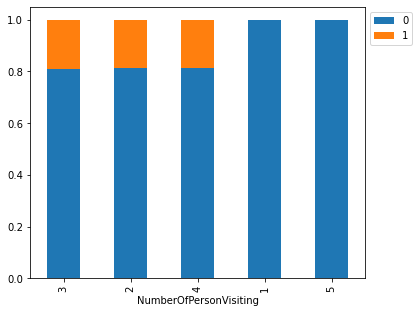

In [147]:
stacked_barplot(df, "NumberOfPersonVisiting", "ProdTaken" )

- The plot shows that the conversion rate is high when the number of persons is more than 1.
- This might be because the company is not providing good solo packages.
- The conversion rate is zero when the number of persons visiting is 5. However, there are just 3 such observations so cannot give any conclusive insights.

### Prod Taken vs Number of Follow ups

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


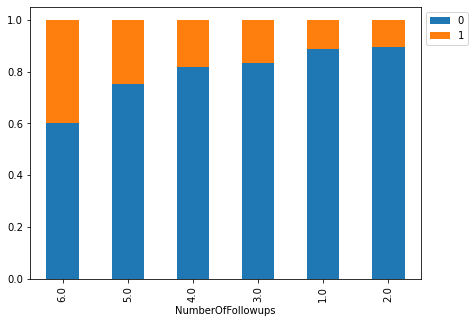

In [148]:
stacked_barplot(df, "NumberOfFollowups", "ProdTaken" )

- We saw earlier that the company usually follows up 3 or 4 times but this plot shows that as number of follow ups increases, the conversion rate for customers increases.
- The Salesperson should ensure to follow up with the customers who are interested in buying the product.

### Prod Taken vs Occupation

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


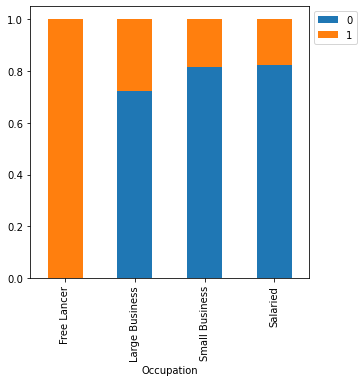

In [149]:
stacked_barplot(df, "Occupation", "ProdTaken" )

- The conversion rate for large business owners is higher than salaried or small business owners. 
- This might be because large business owners have high income.
- Freelancer have 100% conversion rate but there is just 2 such observation, so cannot give any conclusive insights.

### Prod Taken vs Marital Status

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


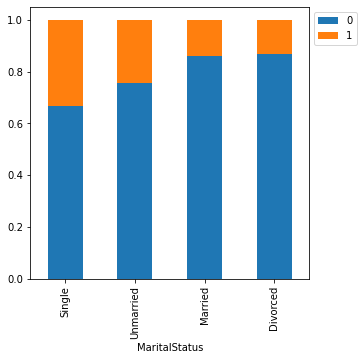

In [150]:
stacked_barplot(df, "MaritalStatus", "ProdTaken" )

- We have seen that married people are the most common customer for the company but this graph shows that the conversion rate is higher for single and unmarried customers as compared to the married customers.
- The company can target single and unmarried customers more and can modify packages as per these customers.

### Prod Taken vs Passport

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


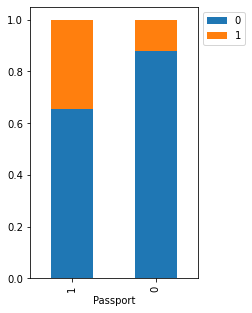

In [151]:
stacked_barplot(df, "Passport", "ProdTaken" )

- The conversion rate for customers with a passport is higher as compared to the customers without a passport.
- The company should customize more international packages to attract more such customers.

### Prod Taken vs Product Pitched

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


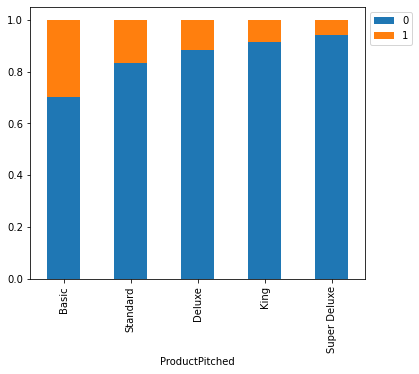

In [152]:
stacked_barplot(df, "ProductPitched", "ProdTaken" )

- The conversion rate of customers is higher if the product pitched is Basic. This might be because the basic package is less expensive. 
- We saw earlier that company pitches the deluxe package more than the standard package, but the standard package shows a higher conversion rate than the deluxe package. The company can pitch standard packages more often.

### Prod Taken vs Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


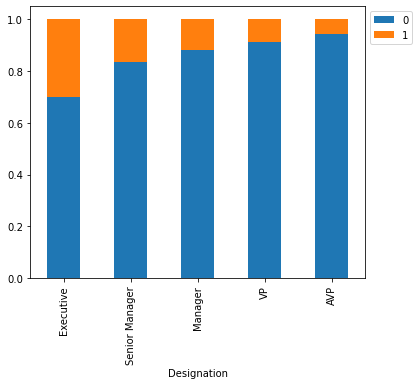

In [153]:
stacked_barplot(df, "Designation", "ProdTaken" )

- The conversion rate of executives is higher than other designations.
- Customers at VP and AVP positions have the least conversion rate.

### Prod Taken vs Duration of Pitch

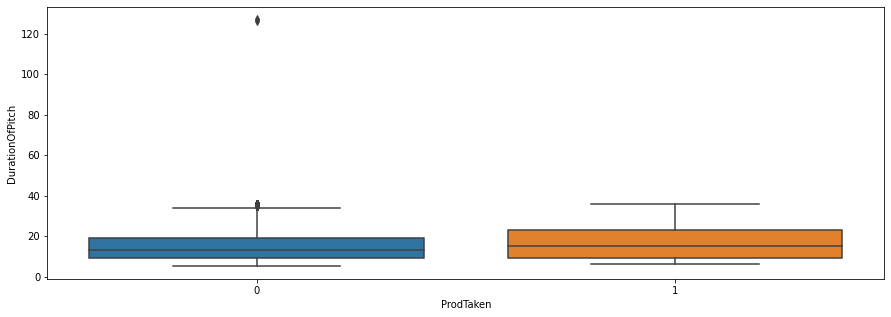

In [155]:
plt.figure(figsize=(15,5))
sns.boxplot(y='DurationOfPitch',x='ProdTaken',data=df)
plt.show()

- We can clearly see that customers who purchased a package have a longer duration of pitch.
- The company salesperson should give more time while pitching a certain package and convey relevant information to the customer  

### Prod Taken vs Monthly Income

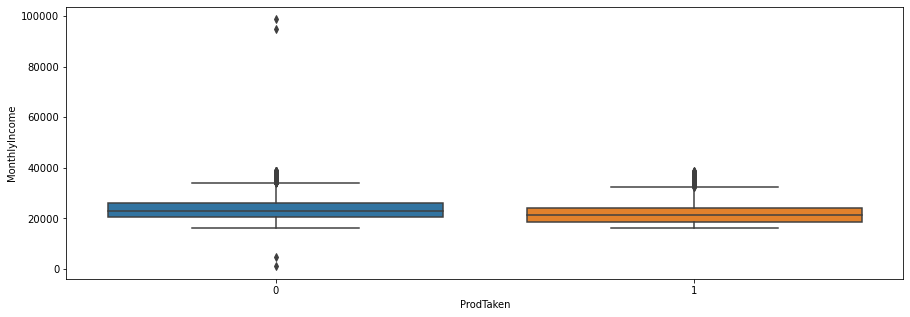

In [156]:
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome',x='ProdTaken',data=df)
plt.show()

- The distribution looks right-skewed for class 0 as well as class 1 which can be expected. 
- Customers who purchased a package have a lower median income than customers who did not purchase a package. This might be because of our earlier observation that executives are more likely to purchase a package.
- Let's check this by adding the variable 'Designation' to this plot.

### Prod Taken vs Monthly Income vs Designation 

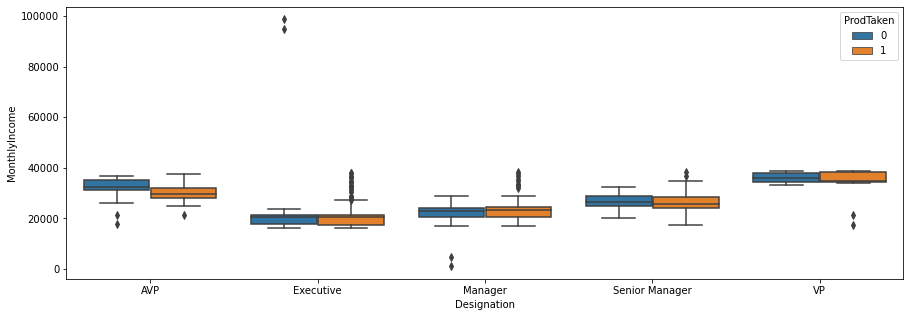

In [157]:
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome',x='Designation',hue='ProdTaken',data =df)
plt.show()

- As expected, the higher the position higher the monthly income of the customer.
- Not much difference in the income of customers at the executive or manager level who did/did not purchase a package. There are many outliers for customers who purchased a package. 
- Customers at VP or AVP positions who purchase a package have a slightly lower median income.

### Prod Taken vs Age

<AxesSubplot:xlabel='Age', ylabel='ProdTaken'>

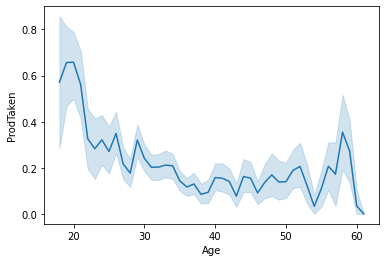

In [158]:
sns.lineplot(x='Age',y='ProdTaken',data=df)

- This plot shows that younger people are more likely to take the product as compared to middle-aged or old people.
- There is a small peak at the age near 60. These might be people who are retired or about to be retired. 

### Grouping df w.r.t to packages to build customer profiles

In [159]:
df[(df['ProductPitched']=='Basic') & (df['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,552.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,515.0,NaN,NaN,NaN,31.28932,9.070829,18.0,25.0,30.0,35.0,59.0
TypeofContact,549,2,Self Enquiry,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552.0,3.0,1.0,392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,532.0,NaN,NaN,NaN,15.791353,7.906926,6.0,9.0,14.0,22.0,36.0
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,2,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552.0,3.0,3.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,548.0,6.0,4.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,552,1,Basic,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Average monthly income for customers opting for the basic package is ~20,165.
- Average age of customers opting for the basic package is ~31
- Majority of the customers opting for the basic package are at the executive designation
- Majority of the customers opting for the basic package are single

In [160]:
df[(df['ProductPitched']=='Standard') & (df['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,124.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,123.0,NaN,NaN,NaN,41.00813,9.876695,19.0,33.0,38.0,49.0,60.0
TypeofContact,124,2,Self Enquiry,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,124.0,3.0,3.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,123.0,NaN,NaN,NaN,19.065041,9.048811,6.0,11.0,17.0,29.0,36.0
Occupation,124,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,124,2,Male,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,124.0,3.0,3.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,124.0,6.0,4.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,124,1,Standard,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Average monthly income of customers opting for the standard package is ~26,035.
- Average age for customers opting for the standard package is ~41
- Majority of the customers opting for the standard package are at senior manager designation
- Majority of the customers opting for the standard package are married

In [161]:
df[(df['ProductPitched']=='Deluxe') & (df['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,204.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,198.0,NaN,NaN,NaN,37.641414,8.469575,21.0,32.0,35.5,44.0,59.0
TypeofContact,204,2,Self Enquiry,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,204.0,2.0,3.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,180.0,NaN,NaN,NaN,19.1,9.227176,6.0,11.0,16.0,28.0,36.0
Occupation,204,3,Small Business,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,204,2,Male,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,204.0,3.0,3.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,200.0,6.0,4.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,204,1,Deluxe,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Average monthly income of customers opting for the deluxe package is ~23,106.
- Average age for customers opting for the deluxe package is ~37
- Majority of the customers opting for the deluxe package are at manager designation
- Majority of the customers opting for the deluxe package are married

In [162]:
df[(df['ProductPitched']=='Super Deluxe') & (df['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,43.5,4.83953,39.0,40.0,42.0,45.25,56.0
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,3.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,18.5,7.330542,8.0,15.0,18.5,20.0,31.0
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,6.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,20,1,Super Deluxe,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Average monthly income of customers opting for the super deluxe package is ~29,823.
- Average age for customers opting for the super deluxe package is ~43
- Majority of the customers opting for the super deluxe package are at AVP designation
- Majority of the customers opting for the super deluxe package are single

In [163]:
df[(df['ProductPitched']=='King') & (df['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,48.9,9.618513,27.0,42.0,52.5,56.0,59.0
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,10.5,4.135851,8.0,8.0,9.0,9.0,19.0
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,4.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductPitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Average monthly income of customers opting for the king package is ~34,672.
- Average age for customers opting for the king package is ~49
- Majority of the customers opting for the king package are at VP designation
- Majority of the customers opting for the king package are single

**These profiles can act as a preliminary step to categorize customers for different packages and based on these profiles:**
- new packages can be customized
- identify the product to be pitched to the customer

### Correlation Heatmap

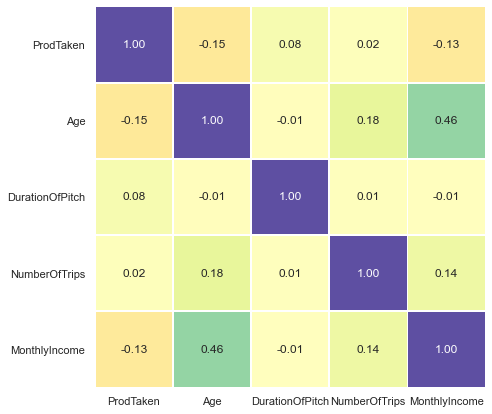

In [164]:
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral",
            fmt='0.2f')
plt.show()

- The Number of trips and age have a weak positive correlation, which makes sense as age increases number of trips is expected to increase.
- Age and monthly income are positively correlated.
- ProdTaken has a weak negative correlation with age which agrees with our earlier observation that as age increases the probability for purchasing a package decreases.  
- No other variables have a high correlation among them.

### To jump back to the EDA summary section, click [here](#eda).